# Which Star Wars Movie is the Best?
In this project, we'll look at survey data collected by *fivethiryeight* to determine which Star Wars movie is the best. The data used in this project was pulled from their github [here](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey)

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Data Exploration

In [2]:
# read in the data
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Although there are 1186 Respondent IDs, there were only 835 respondents from the surveys. We have confirmation from that in the original article [here](https://fivethirtyeight.com/features/americas-favorite-star-wars-movies-and-least-favorite-characters/).

In [3]:
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          837 non-null    object 
 3   Which of the following Star 

In [4]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

The sample of data and column list above, shows we have columns that represent columns and others that represent answers (*Unnamed*). For the answer questions, there are some where the respondent had to check more than one box. We'll do some data cleaning to make it easier to work with.

## Data Cleaning
As mentioned above, there were 835 respondents to the original survey. We'll start by filtering the dataset to remove all the extra rows.

In [5]:
star_wars = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].notnull()]

Next, we'll convert the yes/no columns to boolean

In [6]:
# dictionary for updated values
bool_dict = {'Yes': True,
             'No': False,
             'Nan': np.nan}
# covert column values to boolean
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(bool_dict)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(bool_dict)

Next we'll convert the columns related to the first question (<code>Which of the following Star Wars films have you seen? Please select all that apply</code>) to boolean. Each column represents a movie, if the repsondent has seen the movie, the name of the movie will be the value for that column. Otherwise, it will be <code>Nan</code>. 

In [7]:
# create mapping for new column values
bool_dict1 = {'Star Wars: Episode I  The Phantom Menace': True,
              'Star Wars: Episode II  Attack of the Clones': True,
              'Star Wars: Episode III  Revenge of the Sith': True,
              'Star Wars: Episode IV  A New Hope': True,
              'Star Wars: Episode V The Empire Strikes Back': True,
              'Star Wars: Episode VI Return of the Jedi': True,
              'Nan': False
             }
# covert column values to boolean
for col in star_wars.iloc[:,3:9]:
    star_wars[col] = star_wars[col].map(bool_dict1)

Since we changed the column values from the names of the movies to boolean, we'll update the column names to be more informative of what the column represents. The column names will include the title of the movie. 

In [8]:
# create mapping for new column names
col_names = {'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1: The Phantom Menace',
             'Unnamed: 4' : 'seen_2: Attack of the Clones',
             'Unnamed: 5' : 'seen_3: Revenge of the Sith',
             'Unnamed: 6' : 'seen_4: A New Hope',
             'Unnamed: 7' : 'seen_5: The Empire Strikes Back',
             'Unnamed: 8' : 'seen_6: Return of the Jedi'
            }
star_wars.rename(columns=col_names, inplace=True)

Below we'll do something similar with the column names related to the third question (<code>Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.</code>). Each column represents a character and the column values are ranking the character: favorably, unfavorably, or unfamiliar.

In [9]:
# update column names
col_names1 = {'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.':'rank_char: Han Solo',
              'Unnamed: 16':'rank_char: Luke Skywalker',
              'Unnamed: 17':'rank_char: Princess Leia Organa',
              'Unnamed: 18':'rank_char: Anakin Skywalker',
              'Unnamed: 19':'rank_char: Obi Wan Kenobi',
              'Unnamed: 20':'rank_char: Emperor Palpatine',
              'Unnamed: 21':'rank_char: Darth Vader',
              'Unnamed: 22':'rank_char: Lando Calrissian',
              'Unnamed: 23':'rank_char: Boba Fett',
              'Unnamed: 24':'rank_char: C-3P0',
              'Unnamed: 25':'rank_char: R2 D2',
              'Unnamed: 26':'rank_char: Jar Jar Binks',
              'Unnamed: 27':'rank_char: Padme Amidala',
              'Unnamed: 28':'rank_char: Yoda'
}
star_wars.rename(columns=col_names1, inplace=True)

In [10]:
# check unique values for character ranking
star_wars['rank_char: Luke Skywalker'].value_counts()

Very favorably                                 552
Somewhat favorably                             219
Neither favorably nor unfavorably (neutral)     38
Somewhat unfavorably                            13
Unfamiliar (N/A)                                 6
Very unfavorably                                 3
Luke Skywalker                                   1
Name: rank_char: Luke Skywalker, dtype: int64

We'll covert the above values into numerical values with a 1 to 6 scale. With 6 being the highest ranking:Very favorably and 1 being the lowest: Very unfavorably

In [11]:
# create mapping for new values
num_rank = {'Very favorably':6,
            'Somewhat favorably':5,
            'Neither favorably nor unfavorably (neutral)':4,
            'Somewhat unfavorably':3,
            'Unfamiliar (N/A)':2,
            'Very unfavorably':1,
            }
# convert values to numbers values
for col in star_wars.iloc[:,15:29]:
    star_wars[col] = star_wars[col].map(num_rank)

We'll do this one last time for the second question (<code>'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'</code>). This column is a little different as the values are numbers. We'll want to convert these to numeric so they're easy to work with but first we'll drop the first row as it is information related to the question, not answers from a respondent. 

In [12]:
# view first row
star_wars.head(1)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1: The Phantom Menace,seen_2: Attack of the Clones,seen_3: Revenge of the Sith,seen_4: A New Hope,seen_5: The Empire Strikes Back,seen_6: Return of the Jedi,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,rank_char: Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,NaN,Response,Response,Response,Response,Response,Response,Response,Response,Response


In [13]:
pd.options.mode.chained_assignment = None  # ignore copy warning
# drop first row
star_wars = star_wars.drop(0)
# convert column values to float type
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

Below we update the column names so it's easier to identify what the columns represent.

In [14]:
# update column names
col_names2 = {'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.':'ranking_1',
              'Unnamed: 10': 'ranking_2',
              'Unnamed: 11': 'ranking_3',
              'Unnamed: 12': 'ranking_4',
              'Unnamed: 13': 'ranking_5',
              'Unnamed: 14': 'ranking_6',}

star_wars.rename(columns=col_names2, inplace=True)

In [15]:
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1: The Phantom Menace,seen_2: Attack of the Clones,seen_3: Revenge of the Sith,seen_4: A New Hope,seen_5: The Empire Strikes Back,seen_6: Return of the Jedi,ranking_1,...,rank_char: Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,6.0,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
3,3.292765e+09,True,False,True,True,True,NaN,NaN,NaN,1.0,...,2.0,I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,6.0,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,5.0,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,6.0,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic


## Analysis
Now that we've cleaned our data, we'll try to figure out which Star Wars movie is the best. First we look at which star wars movie has the highest ranking among respondents. *Star Wars V: The Empire Strikes Back* has the lowest score meaning it was ranked as the favorite overall by the respondents. *Star Wars III: Revenge of the Sith* was the least favorite.

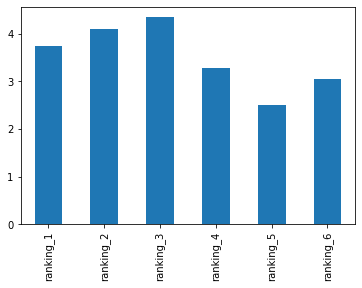

In [16]:
%matplotlib inline
# bar chart to compare movie rankings
star_wars.mean()[star_wars.columns[9:15]].plot.bar()
plt.show()

In [17]:
# percentage of respondents who ranked Star Wars V as the best movie
sum(star_wars['ranking_5'] == 1)/len(star_wars) * 100

34.569377990430624

The bar chart below represents how many respondents have seen each movie. The two most recent movies have been viewed by the most people (*Star Wars V: The Empire Strikes Back* & *Star Wars VI: Return of the Jedi*). The rankings of the movies above follows a similar pattern as the number of people who have seen each movie below. The movies that the most repondents have seen have the highest ranking and vice versa.

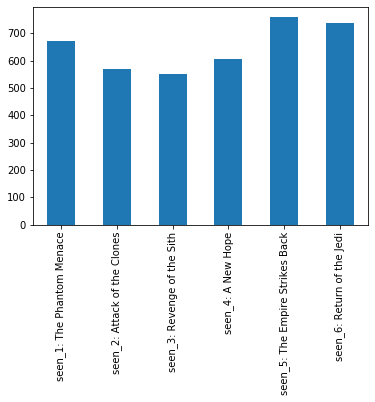

In [18]:
#bar chart to compare how many respondents have seen each movie
star_wars.sum()[star_wars.columns[3:9]].plot.bar()
plt.show()

### Star Wars Fans vs Non-Fans
It would be expected that people who are not big Star Wars fans have only seen the more recent movies and would also rank those as their favorite. We want to compare how people who consider themselves Star Wars fans compare to people who are not fans to see if the rankings change at all. 

In [19]:
# split the dataset into star wars fans and non-fans
fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True]
not_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == False]

In [20]:
# counting number of fans and non-fans
print('fans: ' + str(len(fans)))
print('not_fans: ' + str(len(not_fans)))

fans: 552
not_fans: 284


The two bar charts below show a comparison of rankings for the Star Wars movies by fans of the series and people who are not fans. Of the fans, *Star Wars V: The Empire Strikes Back* was ranked as the favorite with *Star Wars VI* and *Star Wars IV* being almost tied for 2nd. The non-fans seem to be in agreement on the favorite, however, they ranked *Star Wars I: The Phantom Menace* a very close second.

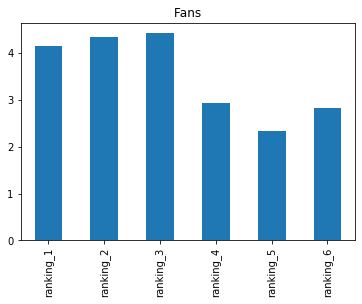

In [21]:
# movie rankings star wars fans
fans.mean()[star_wars.columns[9:15]].plot.bar()
plt.title('Fans')
plt.show()

In [22]:
# percentage of fans who ranked Star Wars 5 as the best movie
sum(fans['ranking_5'] == 1)/len(fans) * 100

35.507246376811594

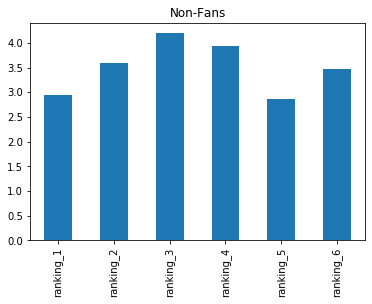

In [23]:
# movie rankings by non star wars fans
not_fans.mean()[star_wars.columns[9:15]].plot.bar()
plt.title('Non-Fans')
plt.show()

In [24]:
# percentage of fans who ranked Star Wars 5 as the best movie
sum(not_fans['ranking_5'] == 1)/len(not_fans) * 100

32.74647887323944

Now we'll look at the differences in how many of the respondents have seen each movie for fans vs non-fans. Not surprisngly, majority of the people who consider themselves Star Wars fans have seen most of the movies.

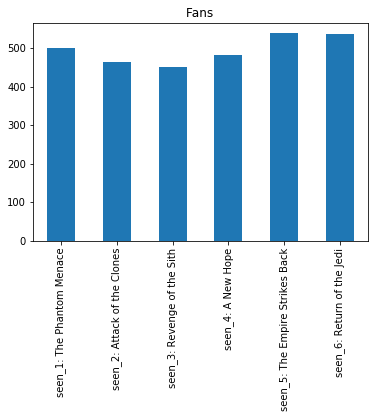

In [25]:
# movie views by star wars fans
fans.sum()[star_wars.columns[3:9]].plot.bar()
plt.title('Fans')
plt.show()

On the contrary, majority of the non-fans have seen the two most recent movies and over half have seen the first movie.

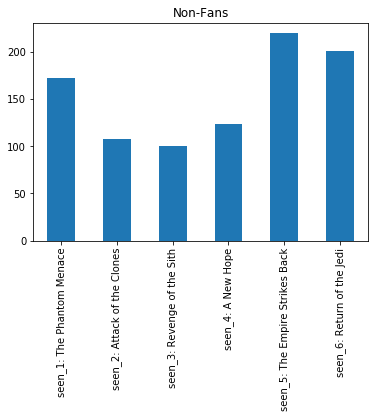

In [26]:
# movie views by non star wars fans
not_fans.sum()[star_wars.columns[3:9]].plot.bar()
plt.title('Non-Fans')
plt.show()

### Age Group Comparisons
When looking at movie rankings by age group, every age group ranked *Star Wars V: The Empire Strikes Back* as the best movie (reminder that the shortest bar represents the favorite). All age groups besides <code>18-29</code> ranked *Star Wars III: Revenge of the Sith* as the worst.

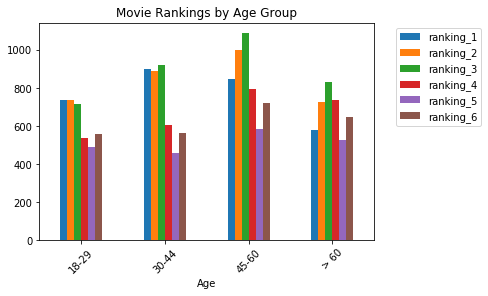

In [27]:
star_wars.groupby('Age').sum()[star_wars.columns[9:15]].plot.bar(rot=45)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Movie Rankings by Age Group')
plt.show()

The two most recent movies have been viewed the most by all age groups besides <code>18-29</code>, they've seen *Star Wars I* slightly more. I would've guessed the older age groups would've had a higher percentage of respondents who have seen the older movie, however, they seem to follow a similar pattern as the younger age groups. *Star Wars II & III* have been viewed the least in all age groups. 

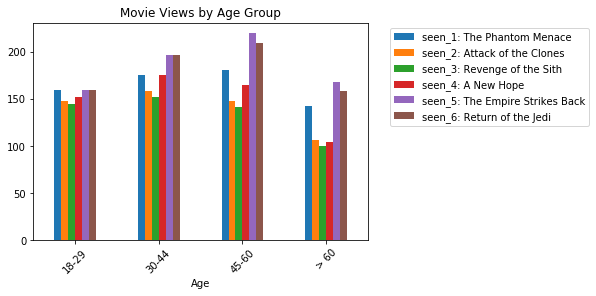

In [28]:
star_wars.groupby('Age').count()[star_wars.columns[3:9]].plot.bar(rot=45)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Movie Views by Age Group')
plt.show()

## Conclusion
*Star Wars V: The Empire Strikes Back* is the best Star Wars movie!